In [1]:
from quantum_badger import *
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['svg'] 

import pandas as pd

colors = ['#8ECAE6', '#219EBC', '#023047', '#FFCB47', '#FFB703', '#FB8500', '#BB0A21']


# The first work regime: "Just give me results!"

Generally speaking, this operation mode needs the complex GBS matrix and samples. To get the matrix, you need to initialize the GBS simulator. Samples for a fixed number of clicked detectors can be generated from the uniform distribution. 

## Initialize the Gaussian Boson Sampling Emulator

There are three options for the initialization: 
1) Import your own parameters of input states and the interferometer matrix as files; 
2) Import your own interferometer matrix and set the parameters of the input state manually; 
3) Set the parameters of the input state manually and generate a random interferometer matrix.

### Option 1: import parameters of your GBS device


In [ ]:
# Step 0: create foldes for the data
#path = create_path(filename='demo.ipynb')
path = "/Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023"
# Use the line below this for reproducibility 
random.seed(42)

# Step 1: Import the interferometer matrix
U = import_interferometer(path, "/matrix_U.dat") 
m = len(U)

# Step 2: Create lists contained squeezing parameters and phases of input states
n = int(m/2) #number of filled states
r = 1.4 # squeezing parameter 

r_ = [r]*n + [0]*(m-n)
phi_ = [0]*m

A = set_input(r_, phi_, path)

# Step 3: Export the main GBS matrix 
M = set_device_parameters(r, A, U, path)

### Option 2: import parameters of your interferometer and set the parameters of the input state manually

Step 0: Create foldes for the data

Step 1: Set the GBS device parameters, such as 

* number of modes `m`
* number of inputs filled by squeezed states `n`
* squeezing parameter of the input squeezed vacuum states `r`

Step 2: Import the interferometer matrix 

You must have a `matrix_U.dat` file for this regime in your directory. Here and further, we record the real part of complex numbers in odd columns, which are tabular separated from the image part in even columns. 

Step 3: Export the main GBS matrix 

The result matrix will be saved in a file `GBS_matrix.dat`

In [ ]:
# Step 0: create foldes for the data
#path = create_path(filename='demo.ipynb')
path = "/Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023"
# Use the line below this for reproducibility 
random.seed(42)

# Step 1: Set the GBS device parameters

#  Number of modes 
m = 8
#  Number of input squeezed states
n = round(m/2) 
#  Squeezing parameter of the input squeezed vacuum states
r = 1.6

r_, phi_ = input_state(r, m, n) 
A = set_input(r_, phi_, path)

# Step 2: Import the interferometer matrix
U = import_interferometer(path, "/matrix_U.dat") 

# Step 3: Export the main GBS matrix 
M = set_device_parameters(r, A, U, path)


### Option 3: Use a default GBS setup

Step 0: Create foldes for the data

Step 1: Set the GBS device parameters, such as 

* number of modes `m`
* squeezing parameter of the input squeezed vacuum states `r`

Step 2: Generate the interferometer matrix and GBS matrix

In `choose_default_device()` method we use the following default settings: the number of beam splitters is $m^2$ and the number of filled inputs $n=m/2$.



**Notes**

- If you want to experiment with interferometer matrices, you can use
`get_random_interferometer(m, n_BS)` method, where `n_BS` is the number of beam splitters. It produces two output files `matrix_U.dat` and `parameters_of_interferometer.dat`. which can be used  `set_device_parameters()` as decribed above. You also can generate interferometer matrix for  `parameters_of_interferometer.dat` specifing the filepath  `get_random_interferometer(m, n_BS, path=path)`. 

- *You also can import previously generated data using the following command:*

`M, m, n, r, n_cutoff, n_mc, batch_size = import_input(path, "GBS_matrix.dat")`

In [2]:
# Step 0: create foldes for the data
#path = create_path(filename='demo.ipynb')
path = "/Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023"
# Use the line below this for reproducibility 
random.seed(42)

# Step 1: Set the GBS device parameters
#  Number of modes 
m = 10
#  Number of input squeezed states
n = round(m/2) 
#  Squeezing parameter of the input squeezed vacuum states
r = 1.4
#  Number of beam splitters 
n_BS = m**2

M, U = choose_default_device(m, r, path=path)

# or
# M, m, n, r, n_cutoff, n_mc, batch_size = import_input(path, "/GBS_matrix.dat")

Data were exported to /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023
Data were exported /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023 in files initial_state.dat, parameters_of_interferometer.dat, matrix_U.dat, GBS_matrix.dat 


## Generate or import samples

At this stage, you can uniformly generate the `batch_size` number of samples using the `uniform_sampling_tr()` method and export them with `export_samples()`. If you would like to get samples with a fixed number of clicked detectors, you need to specify the `n_clicked` argument. 

Also, you are able to import previously generated samples using `import_samples()`. The imported file must consist of a collection of binary sequence samples, with each sample starting on a new line, for example

```
11010100
10100011
00101101
00101110
11100001
10001011
```

In [3]:
batch_size = 10 
n_clicked = 7 #int(m/2) ### !!! more than 4 for computing Minors

samples = uniform_sampling_tr(batch_size,n_clicked,m)
export_samples(samples, path, "/samples.dat")

# or
#samples = import_samples(path, "/samples.dat")

samples

[[1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
 [1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
 [1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 1, 0, 0],
 [1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 1, 0, 0]]

## Get approximate probabilities

`dict_probabilities` is a dictionary containing unique samples and approximate probabilities for them. 

In [4]:
dict_probabilities = compute_probabilities(samples, path=path)

Data were imported from /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023/GBS_matrix.dat


or import it 

In [5]:
dict_probabilities = import_approx_probabilities(path=path)

## Obtain DataFrame with results

In [6]:
df = get_result_df(samples, M, dict_probabilities, exact_prob = True)
dict_format = get_dict_format(df)   

df.info()
df.style.format(dict_format)

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1001110111 to 1101111100
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_clicks              9 non-null      int64  
 1   probability_exact     9 non-null      float64
 2   n_counts              9 non-null      int64  
 3   probability_approx_2  9 non-null      float64
 4   probability_approx_3  5 non-null      float64
 5   probability_approx_4  2 non-null      float64
dtypes: float64(4), int64(2)
memory usage: 504.0+ bytes


,n_clicks,probability_exact,n_counts,probability_approx_2,probability_approx_3,probability_approx_4
sample,,,,,,
1001110111,7,1.220e-03,1,1.359e-03,nan,nan
1111001011,7,9.340e-04,1,2.210e-03,2.023e-03,1.933e-03
0111111001,7,1.253e-03,1,1.323e-03,1.382e-03,nan
1011111001,7,1.402e-03,1,2.186e-03,nan,nan
1100110111,7,4.400e-04,2,8.508e-04,8.568e-04,7.148e-04
1101101011,7,1.425e-03,1,3.046e-03,nan,nan
1111110100,7,3.826e-03,1,2.162e-03,nan,nan
1111100011,7,4.019e-04,1,1.031e-03,9.703e-04,nan
1101111100,7,3.436e-03,1,2.064e-03,2.014e-03,nan


In [ ]:
#export DataFrame
df.to_csv(path + "/output/samples_probabilities.csv") 

## Test the approximate probabilities

### Relative weighted error 
### Total Variation Distance 
### Fidelity 
### Cross entropy


In [7]:
df_tests = get_tests_df(df)

df_tests.head()

,"(p_exact, p_exact)","(p_exact, p_appr_2)","(p_exact, p_appr_3)","(p_exact, p_appr_4)","(p_exact, p_uniform)"
test,,,,,
relative_weighted_error,0.000000,0.461311,NaN,NaN,0.893846
total_variation_distance,0.000000,0.001665,NaN,NaN,0.002850
fidelity,0.000206,0.000214,NaN,NaN,0.000111
cross_entropy,0.128333,0.129136,NaN,NaN,0.143376


---
## Test samples 

### HOG test 
### Bayesian Test
### Correlation Test 

---
### Heavy Output Generation rate

The Heavy Output Generation (HOG) rate was introduced as a convenient way to compare samples from the Boson Sampling experiment and the exact distribution with minimum of computational resources. It is given as

\begin{equation*}
\begin{gathered}
r_{HOG} (n) = \frac{P(S^{exp}_n)}{P(S^{exp}_n) + P(S^{adv}_n)}
\end{gathered}
\end{equation*}

where $n$ is a sample number in a bunch of experimental samples $\{S^{exp}\}$, $P(S_n)$ are the exact calculated probabilities of a samples $S_n$, ${S^{adv}}$ are samples from an adversary classical algorithm. Usually, the HOG rate dependence is given for a fixed number of photon events (clicked threshold detectors or a number of detected photons for photon number resolved detectors) and  it equals to $1$ if the experimental samples $\{S^{exp}\}$ is rather from the actual probability distribution then the adversary (the last is, for example, the thermal states hypothesis as shown in figure below)


<img src="HOG_test_from_experiment.jpg" alt="Drawing" style="width: 700px;"/>

*figure S26 is from Supplementary Materials for Zhong, Han-Sen, et al. "Quantum computational advantage using photons." Science 370.6523 (2020): 1460-1463.*

In [ ]:
def HOG_rate(experimental_samples, mockup_samples, M):
    
    """Returns a value of Heavy Output Generation rate 
    for target samples (experimental_samples) and from
    adversary samples (mockup_samples)."""
    r = 0 
    batch_size = len(experimental_samples)
    
    for i in range(batch_size):
        
        r += (
            prob_exact(experimental_samples[i], M)/
            (
                 prob_exact(experimental_samples[i], M) +
                 prob_exact(mockup_samples[i], M)
            ) / batch_size
        )
    
    return r

# exp_samples = np.copy(samples) 
# adv_samples = np.copy(uniform_samples)  

# res_forw = []
# res_back = []

# for i in range(len(exp_samples)):
#     res_forw.append(HOG_rate(exp_samples, adv_samples,i, M))
#     res_back.append(HOG_rate(adv_samples, exp_samples,i, M))
    
# # Plot the HOG rate test 

# plt.plot(res_forw, '.', label = 'gaussian boson sampling')
# plt.plot(res_back, '.', label = 'uniform sampling' )
# plt.legend(prop={"size": 13}, loc="center")
# plt.xlabel("N", fontsize=15)
# plt.ylabel("HOG rate", fontsize=15)
# plt.title("Title")
# plt.show()    

# The second work regime: "Show me how it works!"

## Compute all possible probabilities exactly

Here we generate DataFrame with probabilities of all basis states. 

In [9]:
M, m, n, r, n_cutoff, n_mc, batch_size = import_input(path, "/GBS_matrix.dat")

df_basis = get_basis_df(M)
df_basis.info()
df_basis.head()

Data were imported from /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023/GBS_matrix.dat
Sum of Probabilities: 1.000e+00
<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 0000000000 to 1111111111
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   n_clicks           1024 non-null   int64  
 1   probability_exact  1024 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 24.0+ KB


,n_clicks,probability_exact
sample,,
0000000000,0,0.021722
1000000000,1,0.000405
0100000000,1,0.001069
0010000000,1,0.002586
0001000000,1,0.001522


#### Find probability of a specific sample in DataFrame

In [10]:
sample = [0]*m 

# or sample ='00000' without convert_list_to_str() method

df_basis["probability_exact"].loc[convert_list_to_str(sample)] 

0.02172203211565676

#### Total probability mass function of a small Gaussian Boson Sampling device

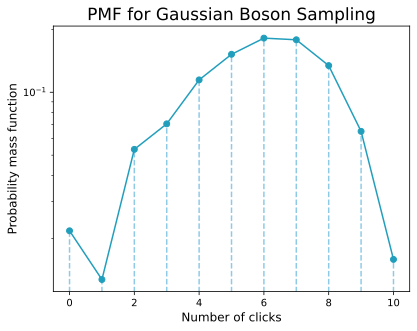

In [11]:
pmf_values = [sum(df_basis["probability_exact"][df_basis["n_clicks"] == n]) for n in range(m+1)]

plt.vlines(
    range(m+1), 
    0,
    pmf_values, 
    color = colors[0],
    linestyles='dashed'
)

plt.plot(
    range(m+1), 
    pmf_values,
    'o-',
    color = colors[1]
)

plt.yscale('log')
plt.xlabel("Number of clicks", fontsize=12)
plt.ylabel("Probability mass function", fontsize=12)
plt.title("PMF for Gaussian Boson Sampling", fontsize=17);
plt.show()

## Validation with Strawberry Fields




## What do sectors look like?
---
#### Total probability mass function of sectors 

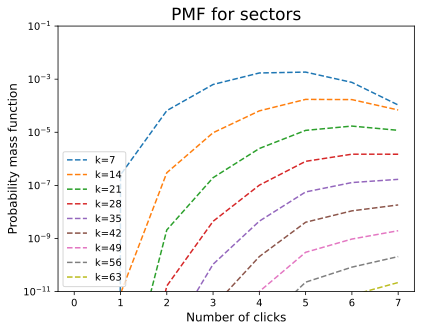

In [17]:
sample = [1]*(m-2) + [0]*2 # just for example
n_clicked = sum(sample)

P_sectors = prob_sectors_exact(M, sample=sample)

for nu in range(n_clicked,n_clicked*10, n_clicked):
    plt.plot(
        range(n_clicked+1),
        [P_sectors[j,nu] for j in range(n_clicked+1)],
        '--' ,
        label = 'k='+str(nu)
)
plt.yscale('log')
plt.ylim(10**(-11), 10**(-1))
plt.legend(prop={'size':10}, loc='lower left')
plt.xlabel("Number of clicks", fontsize=12)
plt.ylabel("Probability mass function", fontsize=12)
plt.title("PMF for sectors", fontsize=17);
plt.show()

In [19]:
print(range(n_clicked+1))

range(0, 8)


In [20]:
[P_sectors[j,10] for j in range(n_clicked+1)]

[-5.2754406679732705e-19,
 2.8482398872286304e-09,
 5.863458526385258e-06,
 9.941300340869214e-05,
 0.00042700875763206124,
 0.0007455575765970043,
 0.0004980205787828885,
 0.0001252882294094231]

In [24]:
cumulants = CumulantUtility(id_ = 0, path=path)
m0, m1, m2, m3, m4 = cumulants.import_moments()
m0[10]

0.014507613075891563

In [27]:
data_minors = np.genfromtxt(path + f'/output/Minors0-1_{0}.dat')

Z_v_0 = np.zeros((70),dtype=np.complex128)

for j in range(70):
     Z_v_0[j] =  data_minors[j,1] + 1j*data_minors[j,2]

normalization = Z_v_0[0].real
normalization

6.032828581420843

---
#### Probability mass function of sectors for a sample

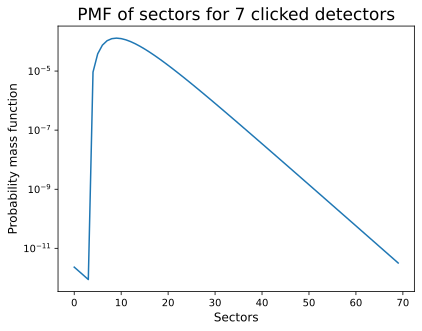

In [18]:
sample = [1]*(m-2) + [0]*2 # just for example
n_clicked = sum(sample)
nu_max = 10*n_clicked


plt.plot(
        range(nu_max),
        [P_sectors[n_clicked,nu] for nu in range(nu_max)],
        '-' 
)
plt.yscale('log')
#plt.legend(prop={'size':10}, loc='lower left')
plt.xlabel("Sectors", fontsize=12)
plt.ylabel("Probability mass function", fontsize=12)
plt.title(f"PMF of sectors for {n_clicked} clicked detectors", fontsize=17);
plt.show()

---
#### Convergence of a sum over sectors to the exact result 

In [ ]:
# Comparison of calculation of the exact probabilities with and without sectors

sample = [1]*(m-2) + [0]*2 # just for example
n_clicked = sum(sample)
nu_max = 10*n_clicked


P_sectors =  prob_sectors_exact(M, sample=sample)

P_ = 0
for nu in range(nu_max):
    P_ += P_sectors[n_clicked,nu]
    

print("Exact probability: ", "{:.3e}".format(P_)) 
print("Probability summed over sectors: ",
      "{:.3e}".format(df_basis["probability_exact"].loc[convert_list_to_str(sample)]))

#### Approximate probability mass function of sectors for a sample


--- 
#### Comparison with Strawberry Fields Library

In [ ]:
import strawberryfields as sf
from strawberryfields.ops import *
from thewalrus import threshold_detection_prob

def sf_result(r_s, phi_s, ind, phi, psi, eta, n_bs, m):

    """
    Here we check our exact probabilities results 
    with the Walrus https://github.com/XanaduAI/thewalrus
    and Strawberry Fields https://github.com/XanaduAI/strawberryfields libraries.  
    """

    prog = sf.Program(m)

    eng = sf.Engine("gaussian")

    with prog.context as q:

        for i in range(m):

            Sgate(r_s[i], phi_s[i]) | q[i]

        for k in range(n_bs):

            Rgate(phi[k]) | q[ind[k,0]]
            BSgate(eta[k]) | (q[ind[k,1]], q[ind[k,0]])
            Rgate(psi[k]) | q[ind[k,1]]

    state = eng.run(prog).state

    mu = state.means()
    cov = state.cov()

    return mu, cov

In [ ]:
M, m, n, r, n_cutoff, n_mc, batch_size = import_input(path, "/GBS_matrix.dat")

df_basis = get_basis_df(M)

r_, phi_ = import_initial_state(path, "/initial_state.dat")
ind, phi, psi, eta, n_bs, m = import_parameters_interferometer(path, "/parameters_of_interferometer.dat")

mu, cov = sf_result(r_, phi_, ind, phi, psi, eta, n_bs, m)
proba_sf = []

for s in df_basis.index.to_list():
    
    proba_sf.append(
        threshold_detection_prob(mu, cov, convert_str_to_list(s)).real
    )

    
df_basis["probability_exact_sf"] = proba_sf
proba_qb = df_basis["probability_exact"].to_list()

print(f"Fidelity between two distributions: {round(fidelity(proba_qb,proba_sf),4)}")
df_basis.head()

---
### Noisy Interferometer Matrix Generation

In [ ]:
error = 0.05

ind, phi, psi, eta, n_bs, m = import_parameters_interferometer(path, '/parameters_of_interferometer.dat')
U_appr = interferometer_approx(n_BS, ind, phi, psi, eta, error,  m)

export_complex_matrix(path + r"/matrix_U_appr.dat", U_appr)

print("Frobenius distance between U and U_appr:", round(frobenius_distance(U, U_appr),2) )

---
### Tests for all states 

In [ ]:
p = df_basis["probability_exact"].to_list()
q = df_basis["probability_exact"].to_list()

print(f"Relative Weighted Error: {round(relative_weighted_error(p,q),4)}")
print(f"Total Variation Distance: {round(total_variation_distance(p,q),4)}")
print(f"Fidelity: {round(fidelity(p,q),4)}")
print(f"Cross Entropy: {round(cross_entropy(p,q),4)}")